#Problem Statement

The task is to classify patients into two groups. In the first group there are patients who have Chronic Kidney Disease and in the second patients without this disease. Initial dataset contains personal parameters such as age, blood pessure etc. And the last parameter is the class of particular patient, which shows presence or absence of Chronic Kidney Disease (ckd/notckd).

####Predicting Chronic Kidney Disease based on health records

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix



# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV




In [2]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
data_copy = data

In [5]:
data_copy.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data_copy.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#Cleaning and preprocessing

In [7]:
data_copy['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [8]:
data_copy.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [9]:
data_copy.pc.value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [10]:
data_copy.pcc.value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [11]:
data_copy.ba.value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [12]:
data_copy.htn.value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [13]:
data_copy.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [14]:
data_copy.cad.value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [15]:
data_copy.appet.value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [16]:
data_copy.pe.value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [17]:
data_copy.ane.value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [18]:
# Mapping the text to 1/0 and cleaning the dataset 
data_copy[['htn','dm','cad','pe','ane']] = data_copy[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0, '\tno':0 , '\tyes' :1})


data_copy[['rbc','pc']] = data_copy[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

data_copy[['pcc','ba']] = data_copy[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

data_copy[['appet']] = data_copy[['appet']].replace(to_replace={'good':1,'poor':0})

data_copy['classification'] = data_copy['classification'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0})
data_copy.rename(columns={'classification':'class'},inplace=True)

data_copy.drop('id',axis=1,inplace=True)

In [19]:
data_copy.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0,0.0,1.0,0.0,0.0,1


In [20]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      398 non-null    object 
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [21]:
# This shows number of rows with missing data
data_copy.isnull().sum(axis = 1)

0      3
1      5
2      3
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [22]:
# This shows number of complete cases and also removes all the rows with NaN
data_copy2 = data_copy.dropna()
print(data_copy2.shape)

(158, 25)


In [23]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    float64
 1   bp      158 non-null    float64
 2   sg      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    float64
 6   pc      158 non-null    float64
 7   pcc     158 non-null    float64
 8   ba      158 non-null    float64
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  sod     158 non-null    float64
 13  pot     158 non-null    float64
 14  hemo    158 non-null    float64
 15  pcv     158 non-null    object 
 16  wc      158 non-null    object 
 17  rc      158 non-null    object 
 18  htn     158 non-null    float64
 19  dm      158 non-null    object 
 20  cad     158 non-null    float64
 21  appet   158 non-null    float64
 22  pe

In [24]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    float64
 1   bp      158 non-null    float64
 2   sg      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    float64
 6   pc      158 non-null    float64
 7   pcc     158 non-null    float64
 8   ba      158 non-null    float64
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  sod     158 non-null    float64
 13  pot     158 non-null    float64
 14  hemo    158 non-null    float64
 15  pcv     158 non-null    object 
 16  wc      158 non-null    object 
 17  rc      158 non-null    object 
 18  htn     158 non-null    float64
 19  dm      158 non-null    object 
 20  cad     158 non-null    float64
 21  appet   158 non-null    float64
 22  pe

In [25]:
data_copy2['pcv'].unique()

array(['32', '29', '16', '24', '37', '33', '28', '36', '22', '40', '52',
       '30', '35', '23', '25', '39', '26', '20', '31', '34', '9', '48',
       '46', '42', '49', '41', '44', '45', '43', '50', '51', '47', '53',
       '54'], dtype=object)

In [26]:
data_copy2['wc'].unique()

array(['6700', '12100', '4500', '11000', '9200', '6900', '9600', '18900',
       '7200', '14600', '6400', '\t6200', '3800', '9800', '12500', '5600',
       '7000', '15200', '5000', '16300', '\t8400', '10500', '7900',
       '10900', '12800', '12400', '19100', '7500', '16700', '26400',
       '8800', '7400', '12000', '15700', '11500', '10200', '5400',
       '10400', '9100', '6200', '8300', '10700', '8400', '4300', '9400',
       '8600', '6800', '9500', '9000', '4700', '6300', '5800', '5500',
       '5300', '7100', '8200', '8100', '7800', '7300', '7700', '9900',
       '5200', '6000', '10300', '9300', '6500', '8000', '9700', '5100',
       '5700', '6600'], dtype=object)

In [27]:
data_copy2['rc'].unique()

array(['3.9', '3.7', '3.8', '2.6', '3.2', '3.4', '4.1', '3.5', '4.3', '4',
       '2.1', '4.2', '5.6', '3.6', '2.9', '2.7', '8.0', '3.0', '3.1',
       '4.8', '4.5', '3.3', '2.5', '5.0', '4.7', '6.2', '5.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '4.9', '5.4', '4.6', '6.4', '6.0',
       '5.9', '5.7', '6.5', '6.1'], dtype=object)

In [28]:

for i in ['pcv','wc','rc']:
    data_copy2[i] = data_copy2[i].str.extract('(\d+\.\d+|\d+)').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    float64
 1   bp      158 non-null    float64
 2   sg      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    float64
 6   pc      158 non-null    float64
 7   pcc     158 non-null    float64
 8   ba      158 non-null    float64
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  sod     158 non-null    float64
 13  pot     158 non-null    float64
 14  hemo    158 non-null    float64
 15  pcv     158 non-null    float64
 16  wc      158 non-null    float64
 17  rc      158 non-null    float64
 18  htn     158 non-null    float64
 19  dm      158 non-null    object 
 20  cad     158 non-null    float64
 21  appet   158 non-null    float64
 22  pe

In [30]:
data_copy2['dm'].unique()

array([0, 1], dtype=object)

In [31]:
data_copy2['dm'] = data_copy2['dm'].astype(str).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    float64
 1   bp      158 non-null    float64
 2   sg      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    float64
 6   pc      158 non-null    float64
 7   pcc     158 non-null    float64
 8   ba      158 non-null    float64
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  sod     158 non-null    float64
 13  pot     158 non-null    float64
 14  hemo    158 non-null    float64
 15  pcv     158 non-null    float64
 16  wc      158 non-null    float64
 17  rc      158 non-null    float64
 18  htn     158 non-null    float64
 19  dm      158 non-null    int64  
 20  cad     158 non-null    float64
 21  appet   158 non-null    float64
 22  pe

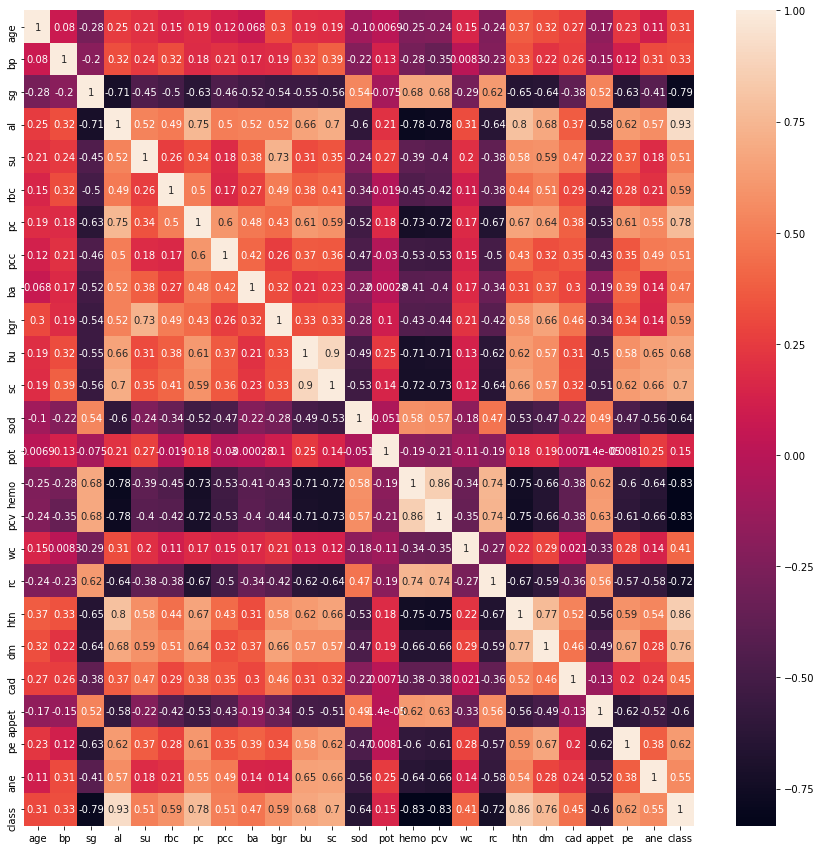

In [33]:
plt.subplots(figsize=(15, 15))
sns.heatmap(data_copy2.corr(),annot = True)

In [34]:
data_copy2.shape

(158, 25)

In [35]:
corr = data_copy2.corr().abs()

In [36]:
corr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.079712,0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,0.190636,0.189721,0.102933,0.006866,0.245645,0.235116,0.153132,0.242235,0.372348,0.323957,0.269868,0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,0.316287,0.386551,0.224710,0.127801,0.282365,0.353504,0.008274,0.228533,0.334951,0.218096,0.257709,0.145047,0.117878,0.311097,0.326567
sg,0.277303,0.198897,1.000000,0.712331,0.448477,0.500494,0.630323,0.460050,0.516392,0.544781,0.545319,0.563122,0.539285,0.075057,0.682086,0.678472,0.288930,0.619092,0.648168,0.639391,0.379305,0.523944,0.633622,0.413252,0.790102
al,0.253380,0.322507,0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,0.661940,0.702889,0.599334,0.209492,0.784745,0.775528,0.314574,0.640099,0.796876,0.678582,0.374755,0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,0.312259,0.347196,0.242491,0.271954,0.385511,0.404821,0.201000,0.377726,0.577286,0.591010,0.466658,0.220547,0.374128,0.179811,0.510615
rbc,0.147971,0.316670,0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,0.378478,0.410408,0.344916,0.019319,0.452566,0.422537,0.108857,0.379378,0.442400,0.511777,0.293269,0.418639,0.282868,0.209797,0.586391
pc,0.188907,0.179834,0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,0.613318,0.588517,0.520324,0.176150,0.733140,0.718042,0.169936,0.667113,0.666767,0.636288,0.384223,0.528435,0.606234,0.545380,0.775388
pcc,0.124032,0.206507,0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,0.366726,0.361965,0.473954,0.030297,0.531182,0.534564,0.146742,0.499401,0.432876,0.321900,0.352255,0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,0.205351,0.229238,0.221374,0.000279,0.410353,0.397500,0.170071,0.343299,0.314961,0.367477,0.297063,0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,0.326496,0.331284,0.284968,0.102226,0.434158,0.443818,0.212093,0.418085,0.579407,0.663012,0.459164,0.338924,0.336141,0.139854,0.591217


In [37]:
data_copy2.shape

(158, 25)

In [38]:
data_copy2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [39]:
X = data_copy2.loc[:,['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]

In [40]:
y = data_copy2['class']

In [41]:
y

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 158, dtype: int64

In [42]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0,0.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1.0,1,0.0,0.0,0.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1.0,1,0.0,0.0,1.0,0.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1.0,1,1.0,0.0,1.0,0.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1.0,1,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0,0.0,1.0,0.0,0.0


In [43]:
#Important Feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [44]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

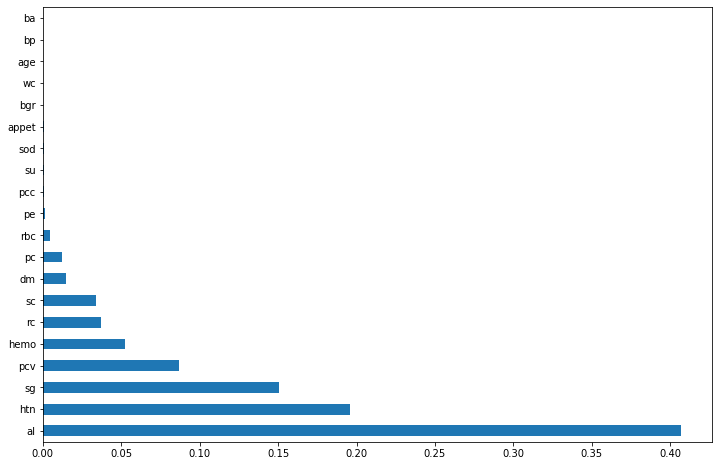

In [45]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
X.drop(['age', 'bp', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'pot', 'wc', 'rc', 'dm', 'cad',
       'appet', 'pe', 'ane',],axis=1,inplace=True)

In [47]:
X.head()

,sg,al,sc,hemo,pcv,htn
3,1.005,4.0,3.8,11.2,32.0,1.0
9,1.020,2.0,7.2,9.5,29.0,1.0
11,1.010,3.0,2.7,10.8,32.0,1.0
14,1.010,3.0,4.1,5.6,16.0,1.0
20,1.015,2.0,3.9,7.7,24.0,1.0


In [48]:
y

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 158, dtype: int64

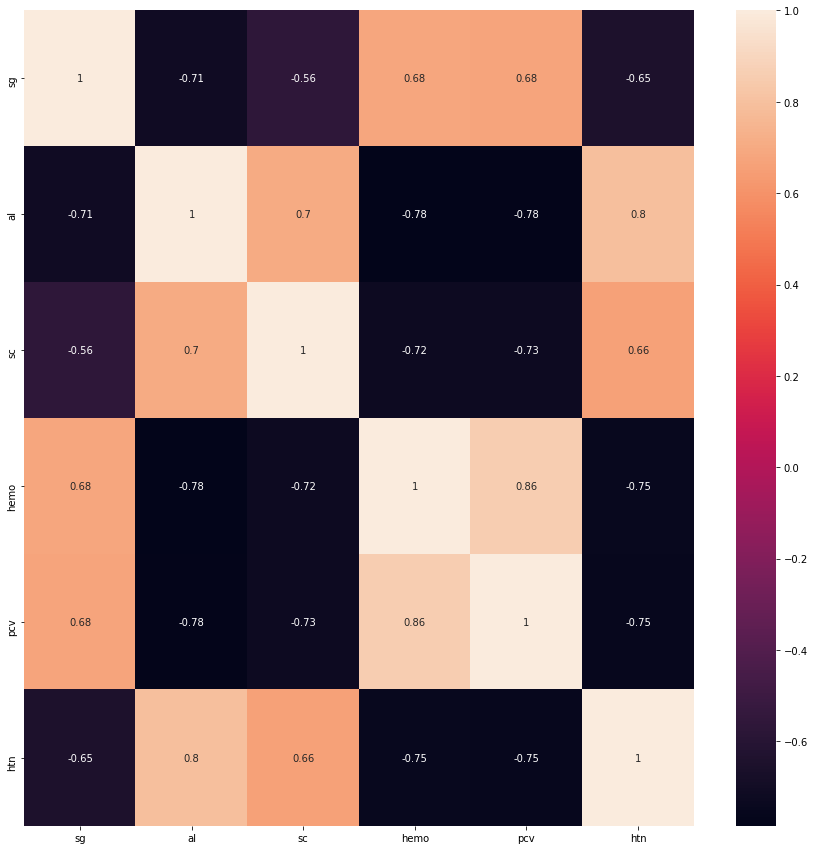

In [49]:
plt.subplots(figsize=(15, 15))
sns.heatmap(X.corr(),annot = True)

In [50]:
from sklearn.model_selection import train_test_split
train_x, test_x ,train_y ,test_y = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [51]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(train_x, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [52]:

model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
## Predict Train set results
y_train_pred = model.predict(train_x)

In [54]:
## Predict Test set results
y_pred = model.predict(test_x)

In [55]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(test_x)[:,1]

In [56]:
# Display first 10 predictions
y_pred_proba[:10]

array([6.60069316e-03, 2.80795857e-03, 1.74480247e-02, 2.12338433e-03,
       3.36140769e-02, 9.99995702e-01, 1.60839181e-02, 4.86820273e-03,
       3.51608517e-03, 4.90855022e-04])

In [57]:

i=22 ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, test_y.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 22, actual class = 1, precited class = 1, predicted probability = 0.9999999982907888


In [58]:
confusion_matrix(test_y, y_pred).T

array([[23,  0],
       [ 0,  9]])

In [59]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [60]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

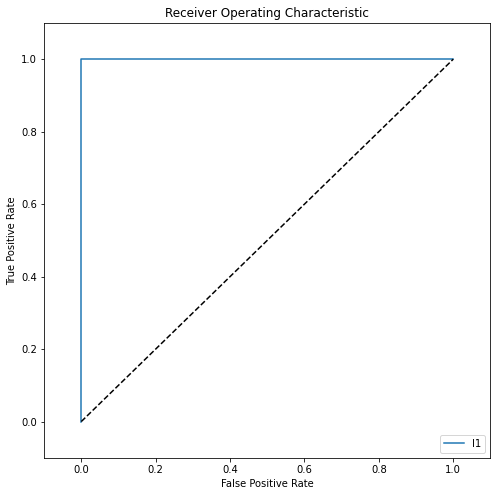

In [61]:

# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
lr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(train_x,train_y)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = lr.predict(test_x)
cnf=confusion_matrix(test_y,y_pred).T
cnf

array([[23,  0],
       [ 0,  9]])

In [64]:
print(lr.score(train_x,train_y))
print(lr.score(test_x,test_y))

1.0
1.0


In [65]:
y_pred = lr.predict([[1.005,	4.0	,3.8,	11.2,	32.0,	1.0]])

In [66]:
y_pred

array([1])

#Save Model


In [67]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Healt_Care_Chronic_Kideny_Prediction.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr, file)

In [68]:
# Load the Model back from file
with open("Healt_Care_Chronic_Kideny_Prediction.pkl" , 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [69]:
Pickled_LR_Model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = Pickled_LR_Model.predict([[1.005,	4.0	,3.8,	11.2,	32.0,	1.0]])
y_pred

array([1])

In [71]:
# Calculate the Score 
score = Pickled_LR_Model.score(test_x,test_y)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  


Test score: 100.00 %
